# Exploratory Data Analysis for Netflix movies and TV shows

I love watching movies. I used to imagine I am a main character of one. Many years have passed since then, but I am still very keen to go to the cinema (watching them on IMAX screens gives me chills of special type) or check some new release out. In this EDA, I will try to dig into the world of entertainment to find something interesting. I will do my very best not to be trivial (no promises, though)

source of the dataset: https://www.kaggle.com/ashishgup/netflix-rotten-tomatoes-metacritic-imdb

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text
import seaborn as sns
%matplotlib inline

### Part I: reducing the size of the dataset, cleaning, organizing the data

In [21]:
netflix = pd.read_csv('netflix-rotten-tomatoes-metacritic-imdb.csv')
copy_df = netflix.copy() #making a copy of dataset 
pd.options.mode.chained_assignment = None  # default='warn'

In [22]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  15480 non-null  object 
 1   Genre                  13770 non-null  object 
 2   Tags                   15413 non-null  object 
 3   Languages              13545 non-null  object 
 4   Series or Movie        15480 non-null  object 
 5   Hidden Gem Score       13379 non-null  float64
 6   Country Availability   15461 non-null  object 
 7   Runtime                15479 non-null  object 
 8   Director               10772 non-null  object 
 9   Writer                 11150 non-null  object 
 10  Actors                 13555 non-null  object 
 11  View Rating            8456 non-null   object 
 12  IMDb Score             13381 non-null  float64
 13  Rotten Tomatoes Score  6382 non-null   float64
 14  Metacritic Score       4336 non-null   float64
 15  Aw

In [23]:
copy_df.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",...,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81336456,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81078393,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN


In [24]:
copy_df = copy_df.drop(columns = ['Tags', 'Trailer Site', 'TMDb Trailer', 'Poster',
                                 'Image', 'Writer', 'Actors', 'Trailer Site', 'IMDb Votes',
                                 'Summary', 'IMDb Link', 'Netflix Link', 'Production House',
                                 'Metacritic Score', 'View Rating', 'Runtime', 
                                  'Country Availability', 'Boxoffice', 'Languages'])

In [25]:
copy_df.head()

,Title,Genre,Series or Movie,Hidden Gem Score,Director,IMDb Score,Rotten Tomatoes Score,Awards Received,Awards Nominated For,Release Date,Netflix Release Date
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance",Series,4.3,Tomas Alfredson,7.9,98.0,74.0,57.0,12 Dec 2008,2021-03-04
1,HOW TO BUILD A GIRL,Comedy,Movie,7.0,Coky Giedroyc,5.8,79.0,1.0,NaN,08 May 2020,2021-03-04
2,Centigrade,"Drama, Thriller",Movie,6.4,Brendan Walsh,4.3,NaN,NaN,NaN,28 Aug 2020,2021-03-04
3,ANNE+,Drama,Series,7.7,NaN,6.5,NaN,1.0,NaN,01 Oct 2016,2021-03-04
4,Moxie,"Animation, Short, Drama",Movie,8.1,Stephen Irwin,6.3,NaN,NaN,4.0,22 Sep 2011,2021-03-04


After deleting the majority of non-relevant columns (even Languages - it's not important here due to it is not being the country where a movie/show was shot), we are clear to proceed and optimize data to our needs.

We will begin with output of unique values and changing their types accordingly

In [26]:
copy_df.nunique()

Title                    15071
Genre                     1780
Series or Movie              2
Hidden Gem Score            93
Director                  6746
IMDb Score                  83
Rotten Tomatoes Score      101
Awards Received            130
Awards Nominated For       200
Release Date              5314
Netflix Release Date      1823
dtype: int64

If I were to describe each column that is important to us and our upcoming analyses:

- **Title**: name of the movie/TV Show
- **Genre**: genre of the movie/TV Show
- **Series or Movie**: Describes whether the given product is movie/TV Show
- **Hidden Gem Score**: This is a score that suggests if this movie/TV Show is what so called 'hidden gem' (like not popular in large audience but still a worthy product
- **Director**:  director of the product
- **IMDb Score**: Average score given by registered users on IMDb.com. We will use it as an opposite values to Rotten Tomatoes
- **Rotten Tomatoes Score**: score of the product aggregated by Rotten Tomatoes. It indicates critics' average score.
- **Awards Received**: How many awards product received 
- **Awards Nominated For**: how many awards a product was nominated for
- **Release Date**: product's full, actual date of release 
- **Netflix Release Date**: product's full, actual date of release on Netflix
- **Release Year**: release year of product itself
- **Release Year on Netflix**: release year on Netflix

We can change columns containing 'Date' to datetime and 'Series or Movie' to category to reduce the size of the dataset

In [27]:
copy_df['Release Date'] = pd.to_datetime(copy_df['Release Date'])
copy_df['Netflix Release Date']= pd.to_datetime(copy_df['Netflix Release Date'])

I will create 2 more columns which contatin only year of release of the movie/TV show, in order to get data easier when analysing the data over the years and not specific dates

In [28]:
copy_df['Release Year'] = pd.DatetimeIndex(copy_df['Release Date']).year
copy_df['Release Year on Netflix'] = pd.DatetimeIndex(copy_df['Netflix Release Date']).year

In [29]:
copy_df.head(1)

,Title,Genre,Series or Movie,Hidden Gem Score,Director,IMDb Score,Rotten Tomatoes Score,Awards Received,Awards Nominated For,Release Date,Netflix Release Date,Release Year,Release Year on Netflix
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance",Series,4.3,Tomas Alfredson,7.9,98.0,74.0,57.0,2008-12-12,2021-03-04,2008.0,2021


Seems like values in 'Release Year' column are float type. I can't convert them while there are NA values in the column.

Actually, there are lots of NA numbers waiting to be dealt with. This time I will have to delete all rows containing NA values in 'Release Year'. The final results will be biased anyway, but we will keep that in mind.

We will be getting rid of NA values along the way, dropping them in necessity 

In [30]:
copy_df = copy_df.dropna(subset = ['Release Date','Netflix Release Date', 'Release Year', 'Release Year on Netflix'])
copy_df['Release Year'] = copy_df['Release Year'].astype('int64')

In [31]:
copy_df.head()

,Title,Genre,Series or Movie,Hidden Gem Score,Director,IMDb Score,Rotten Tomatoes Score,Awards Received,Awards Nominated For,Release Date,Netflix Release Date,Release Year,Release Year on Netflix
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance",Series,4.3,Tomas Alfredson,7.9,98.0,74.0,57.0,2008-12-12,2021-03-04,2008,2021
1,HOW TO BUILD A GIRL,Comedy,Movie,7.0,Coky Giedroyc,5.8,79.0,1.0,NaN,2020-05-08,2021-03-04,2020,2021
2,Centigrade,"Drama, Thriller",Movie,6.4,Brendan Walsh,4.3,NaN,NaN,NaN,2020-08-28,2021-03-04,2020,2021
3,ANNE+,Drama,Series,7.7,NaN,6.5,NaN,1.0,NaN,2016-10-01,2021-03-04,2016,2021
4,Moxie,"Animation, Short, Drama",Movie,8.1,Stephen Irwin,6.3,NaN,NaN,4.0,2011-09-22,2021-03-04,2011,2021


Optimizing 'Genre' column to reduce the number of genre that movie belongs to, to main one.

In [32]:
copy_df['Genre'] = copy_df['Genre'].str.split(', ').str.get(0).str.strip()

In [33]:
copy_df['Genre'].value_counts() #now it looks more managable

Comedy         3341
Drama          2489
Action         2160
Animation      1567
Documentary     963
Crime           699
Biography       432
Adventure       423
Horror          365
Short           165
Reality-TV      111
Family          109
Romance         102
Thriller        101
Mystery          63
Fantasy          63
Game-Show        40
Music            26
Sci-Fi           19
Musical          16
History          11
Sport             9
Western           9
Talk-Show         7
Adult             7
War               2
Film-Noir         1
News              1
Name: Genre, dtype: int64

In [34]:
copy_df.head()

,Title,Genre,Series or Movie,Hidden Gem Score,Director,IMDb Score,Rotten Tomatoes Score,Awards Received,Awards Nominated For,Release Date,Netflix Release Date,Release Year,Release Year on Netflix
0,Lets Fight Ghost,Crime,Series,4.3,Tomas Alfredson,7.9,98.0,74.0,57.0,2008-12-12,2021-03-04,2008,2021
1,HOW TO BUILD A GIRL,Comedy,Movie,7.0,Coky Giedroyc,5.8,79.0,1.0,NaN,2020-05-08,2021-03-04,2020,2021
2,Centigrade,Drama,Movie,6.4,Brendan Walsh,4.3,NaN,NaN,NaN,2020-08-28,2021-03-04,2020,2021
3,ANNE+,Drama,Series,7.7,NaN,6.5,NaN,1.0,NaN,2016-10-01,2021-03-04,2016,2021
4,Moxie,Animation,Movie,8.1,Stephen Irwin,6.3,NaN,NaN,4.0,2011-09-22,2021-03-04,2011,2021


In [35]:
copy_df['Genre'] = copy_df['Genre'].astype('category')
copy_df['Series or Movie'] = copy_df['Series or Movie'].astype('category') 
#Optimizing size of the dataset by reducing the number of types

In [36]:
copy_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13373 entries, 0 to 15473
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Title                    13373 non-null  object        
 1   Genre                    13301 non-null  category      
 2   Series or Movie          13373 non-null  category      
 3   Hidden Gem Score         13062 non-null  float64       
 4   Director                 10509 non-null  object        
 5   IMDb Score               13063 non-null  float64       
 6   Rotten Tomatoes Score    6354 non-null   float64       
 7   Awards Received          6013 non-null   float64       
 8   Awards Nominated For     7585 non-null   float64       
 9   Release Date             13373 non-null  datetime64[ns]
 10  Netflix Release Date     13373 non-null  datetime64[ns]
 11  Release Year             13373 non-null  int64         
 12  Release Year on Netflix  13373 n

For now, I believe I've done a good job. I've reduced the size of the dataset from 3.4+ MB down to 1.3 MB; I've organized 'Genre' columns to make it more transparent and less detailed for wider audience; I've got rid off non-relevant columns and added 2 new to use them in analysis which will require year of release but not a specific date.

# Part II - data analysis

In [37]:
analysis_df = copy_df.set_index('Title')
analysis_df

,Genre,Series or Movie,Hidden Gem Score,Director,IMDb Score,Rotten Tomatoes Score,Awards Received,Awards Nominated For,Release Date,Netflix Release Date,Release Year,Release Year on Netflix
Title,,,,,,,,,,,,
Lets Fight Ghost,Crime,Series,4.3,Tomas Alfredson,7.9,98.0,74.0,57.0,2008-12-12,2021-03-04,2008,2021
HOW TO BUILD A GIRL,Comedy,Movie,7.0,Coky Giedroyc,5.8,79.0,1.0,NaN,2020-05-08,2021-03-04,2020,2021
Centigrade,Drama,Movie,6.4,Brendan Walsh,4.3,NaN,NaN,NaN,2020-08-28,2021-03-04,2020,2021
ANNE+,Drama,Series,7.7,NaN,6.5,NaN,1.0,NaN,2016-10-01,2021-03-04,2016,2021
Moxie,Animation,Movie,8.1,Stephen Irwin,6.3,NaN,NaN,4.0,2011-09-22,2021-03-04,2011,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
District 13: Ultimatum,Action,Movie,3.4,Patrick Alessandrin,6.5,75.0,NaN,1.0,2009-02-18,2015-04-14,2009,2015
13 Going on 30,Comedy,Movie,3.1,Gary Winick,6.2,65.0,NaN,11.0,2004-04-23,2015-04-14,2004,2015
LIFE 2.0,Documentary,Movie,8.2,Jason Spingarn-Koff,6.2,89.0,1.0,NaN,2010-01-22,2015-04-14,2010,2015


### 2.1. Movies vs Series: Netflix numbers

Let's start with the easiest. For example, how many movies and TV Shows there are in this data set

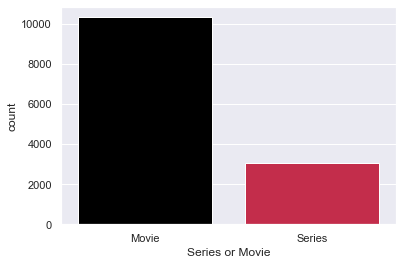

In [71]:
sns.set(style='darkgrid', rc = {'figure.figsize':(6,4), 'font.size': 3})
pl=sns.countplot(x='Series or Movie', data = analysis_df, palette=['Black','Crimson'])

It is clear now that the majority of dataset contents are movies. The dataset's last update took place in spring 2021. 

In [45]:
#splitting the dataset into movies and series

movies = analysis_df[analysis_df['Series or Movie'] == 'Movie']
series = analysis_df[analysis_df['Series or Movie'] == 'Series']

In [46]:
#grouping movies and series by genre
movies_genre_group = movies.groupby('Genre')
series_genre_group = series.groupby('Genre')

### 2.2. The most awarded movies in each genre

In [47]:
def get_largest_award(df):
    return df.nlargest(1, 'Awards Received') #function to apply and get largest awarded movies of each genre

In [48]:
largest_awards_number_in_every_genre_df = movies_genre_group.apply(get_largest_award).drop(columns = 'Genre') 
#applying the function

Here we go: the most awarded movies of each genre listed on this dataset

In [49]:
largest_awards_number_in_every_genre_series = largest_awards_number_in_every_genre_df['Awards Received']
largest_awards_number_in_every_genre_series

Genre        Title                            
Action       Mad Max: Fury Road                   241.0
Adventure    The Shape of Water                   137.0
Animation    Spider-Man: Into the Spider-Verse     79.0
Biography    12 Years a Slave                     242.0
Comedy       Parasite                             300.0
Crime        No Country for Old Men               164.0
Documentary  For Sama                              69.0
Drama        ROMA                                 251.0
Family       E.T. the Extra-Terrestrial            51.0
Fantasy      Sleepy Hollow                         28.0
Game-Show    Big Brother                            4.0
History      The Last Witness                      40.0
Horror       Get Out                              151.0
Music        Metallica Through the Never            1.0
Musical      Holy Camp!                             8.0
Mystery      Memento                               57.0
Romance      Loves Whirlpool                        4.0
S

### 2.3. Which genre has the highest number of awards on average?

In [50]:
#to aggregate genre results. It is easier and more neat to observe the graph as whole
aggregations = {'IMDb Score': 'mean',
               'Rotten Tomatoes Score': 'mean',
               'Awards Received': 'mean' }

In [51]:
aggregations_movies = movies_genre_group.agg(aggregations) #applying aggregation
aggregations_movies = aggregations_movies.reset_index()

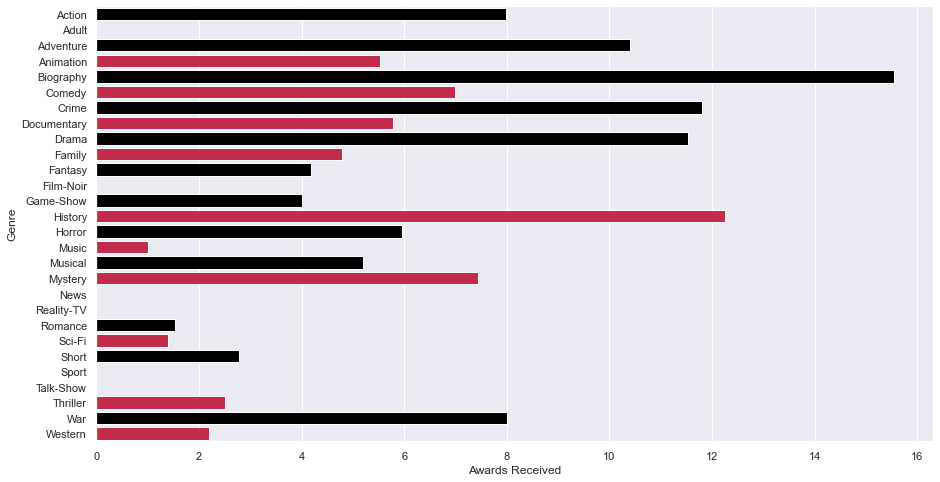

In [60]:
sns.set(style='darkgrid', rc = {'figure.figsize':(15,8), 'font.size': 3})
pl2 = sns.barplot(x = 'Awards Received',y = 'Genre', data = aggregations_movies, palette=['Black','Crimson'])

Keeping in mind that number of movies of each genre vary, somewhere by a lot, we can clearly see that the 'most awarded' genre is **'Biography'** with mean ~ 15.54, and it's followed by **'History'** (mean ~ 12.25) and **'Crime'** (mean ~11.8)

### 2.4. Critics vs. Audience: their attitude towards each genre

#### Let me remind myself what does 'movies' part of the dataset look like 

In [53]:
movies.head()

,Genre,Series or Movie,Hidden Gem Score,Director,IMDb Score,Rotten Tomatoes Score,Awards Received,Awards Nominated For,Release Date,Netflix Release Date,Release Year,Release Year on Netflix
Title,,,,,,,,,,,,
HOW TO BUILD A GIRL,Comedy,Movie,7.0,Coky Giedroyc,5.8,79.0,1.0,NaN,2020-05-08,2021-03-04,2020,2021
Centigrade,Drama,Movie,6.4,Brendan Walsh,4.3,NaN,NaN,NaN,2020-08-28,2021-03-04,2020,2021
Moxie,Animation,Movie,8.1,Stephen Irwin,6.3,NaN,NaN,4.0,2011-09-22,2021-03-04,2011,2021
The Con-Heartist,Comedy,Movie,8.6,Mez Tharatorn,7.4,NaN,NaN,NaN,2020-12-03,2021-03-03,2020,2021
Only a Mother,Drama,Movie,8.3,Alf Sjöberg,6.7,NaN,2.0,1.0,1949-10-31,2021-03-03,1949,2021


#### All we need for this part of analysis are the 'score' columns. Everything else is extra - so we drop other columns.

In [54]:
movies_for_normalization = movies.reset_index().drop(columns = ['Title', 'Series or Movie',
                                                               'Hidden Gem Score', 'Director',
                                                               'Awards Received', 'Awards Nominated For',
                                                               'Release Date', 'Netflix Release Date',
                                                               'Release Year', 'Release Year on Netflix']).dropna()
                        

In [55]:
movies_for_normalization.head()

,Genre,IMDb Score,Rotten Tomatoes Score
0,Comedy,5.8,79.0
7,Crime,6.2,20.0
8,Drama,7.6,92.0
11,Crime,8.4,68.0
12,Action,6.5,52.0


#### Now that I have columns I need, I should move on and normalize both of 'score' columns data.

Z-score normalization refers to the process of normalizing every value in a dataset such that the mean of all of the values is 0 and the standard deviation is 1. Typically we normalize data when performing some type of analysis in which we have multiple variables that are measured on different scales and we want each of the variables to have the same range.

In [56]:
zscore = lambda x: (x - x.mean()) / x.std()
movies_for_normalization['IMDb z-score'] = movies_for_normalization['IMDb Score'].transform(zscore)
movies_for_normalization['Rotten Tomatoes z-score'] = movies_for_normalization['Rotten Tomatoes Score'].transform(zscore)
movies_for_normalization.head()

,Genre,IMDb Score,Rotten Tomatoes Score,IMDb z-score,Rotten Tomatoes z-score
0,Comedy,5.8,79.0,-0.617861,0.722833
7,Crime,6.2,20.0,-0.228261,-1.456031
8,Drama,7.6,92.0,1.135337,1.202922
11,Crime,8.4,68.0,1.914537,0.316604
12,Action,6.5,52.0,0.063938,-0.274274


#### After normalizing data and getting z-scores for their respective columns, I make a pivot table, with the average z-scores of each genre

In [57]:
pivot_table = pd.pivot_table(movies_for_normalization, 
                             values = ['IMDb z-score', 'Rotten Tomatoes z-score'],
                            index = 'Genre').dropna()
pivot_table

,IMDb z-score,Rotten Tomatoes z-score
Genre,,
Action,-0.146831,-0.246595
Adventure,0.014670,0.049330
Animation,0.147723,0.228449
Biography,0.509589,0.331934
Comedy,-0.186269,-0.121222
Crime,0.235631,0.106780
Documentary,0.680251,0.858831
Drama,0.201949,0.217081
Family,-1.007461,-0.131830


All that left is to plot a graph:

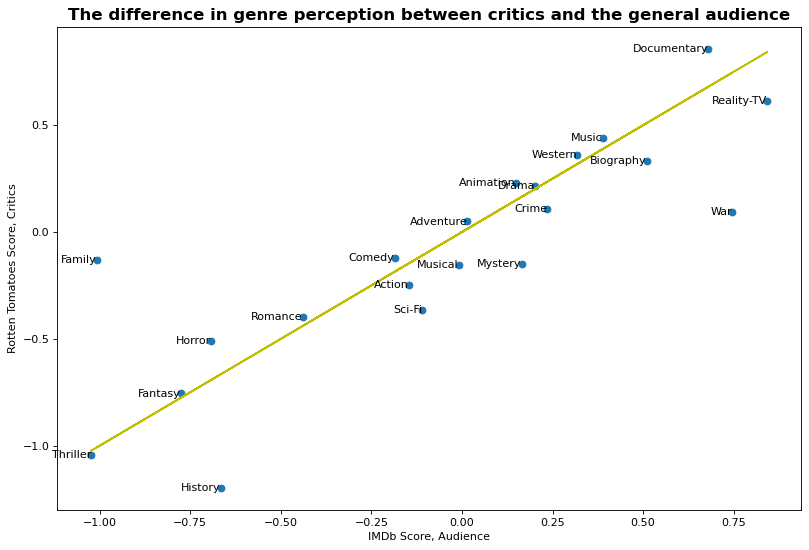

In [58]:
x = pivot_table['IMDb z-score']
y = pivot_table['Rotten Tomatoes z-score']


# configuring the plot
plt.figure(figsize=(12, 8), dpi=80)
plt.xlabel('IMDb Score, Audience')
plt.ylabel('Rotten Tomatoes Score, Critics')
plt.title('The difference in genre perception between critics and the general audience', fontsize = 15,
         weight = 'bold')

# 45 degree line
plt.plot(x,x,'y-')

#labeling dots on the plot
plt.scatter(pivot_table['IMDb z-score'], pivot_table['Rotten Tomatoes z-score'])

for idx, row in pivot_table.iterrows(): 
    plt.text(row['IMDb z-score'], row['Rotten Tomatoes z-score'], idx, fontsize = 10,
            horizontalalignment = 'right',
            verticalalignment = 'center',
            fontstretch = 'expanded')

We can see that a linear relationship between audience and critics' exists - the pattern of X- and Y-values resembles a line uphill. The correlation is moderate.

Based on the data we have, we can see that critics prefer genres like Documentary, Family way more than general audience. 

The audience, on the contrary, enjoys History and War genres more than cinema experts.

### 2.5 What share does each genre take, based on the total number of films 

Due to the lack of coding skills, I've made a decision to export the dataframe needed to visualize how many movies there are in each genre. Tableu is preferred and easiest solution to my problem.

In [64]:
counted_movies = movies.groupby('Genre').count().drop(columns = ['Hidden Gem Score', 'Director', 'IMDb Score',
                                               'Rotten Tomatoes Score', 'Awards Received',
                                               'Awards Nominated For', 'Release Date',
                                               'Netflix Release Date', 'Release Year',
                                               'Release Year on Netflix'])

In [65]:
counted_movies

,Series or Movie
Genre,
Action,1958
Adult,5
Adventure,359
Animation,764
Biography,400
Comedy,2776
Crime,491
Documentary,675
Drama,1997


In [68]:
excel_file = pd.ExcelWriter('netflix_genre_share.xlsx')

In [69]:
counted_movies.to_excel(excel_file, sheet_name = 'Genre share')

In [70]:
excel_file.save()

### The actual packed-bubble plot

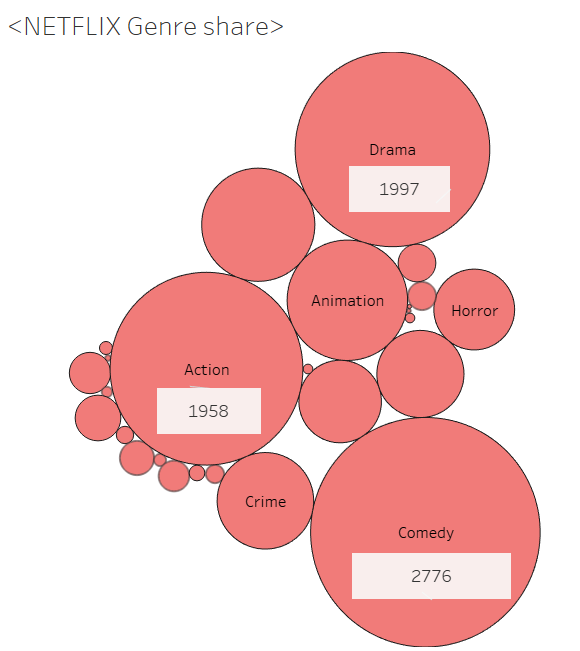

And here we are. Looks like the TOP-3 of genres which have the most number of movies under their roof are:

- Comedy
- Drama
- Action

## Summary

So, what did I learn from the analysis?

- First of all, the easiest one - I learned there are more movies than TV-show on Netflix
- Secondly, I learned that the most-awarded TOP-3 genres on Netflix are: Biography, Crime and History
- Third, we made a list of the most-awarded movies of each genre which are present on Netflix
- Fourth, based on the data at my disposal can see that critics prefer genres like Documentary, Family way more than general audience. The audience, on the contrary, enjoys History and War genres more than cinema experts
- Finally, TOP-3 genres on Netflix with the most number of movies are Comedy, Drama and Action